# importing required libraries...

In [58]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation

from sklearn.metrics import silhouette_score
import plotly as py
import plotly.graph_objs as go
import scipy.cluster.hierarchy as sch
from itertools import product

### (1) download and load the dataset

In [3]:
data = pd.read_csv(r"/content/Mall_Customers.csv")

data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
data.shape

(200, 5)

### (3)Perform Below Visualizations.
#### ∙ Univariate Analysis
#### ∙ Bi- Variate Analysis
#### ∙ Multi-Variate Analysis

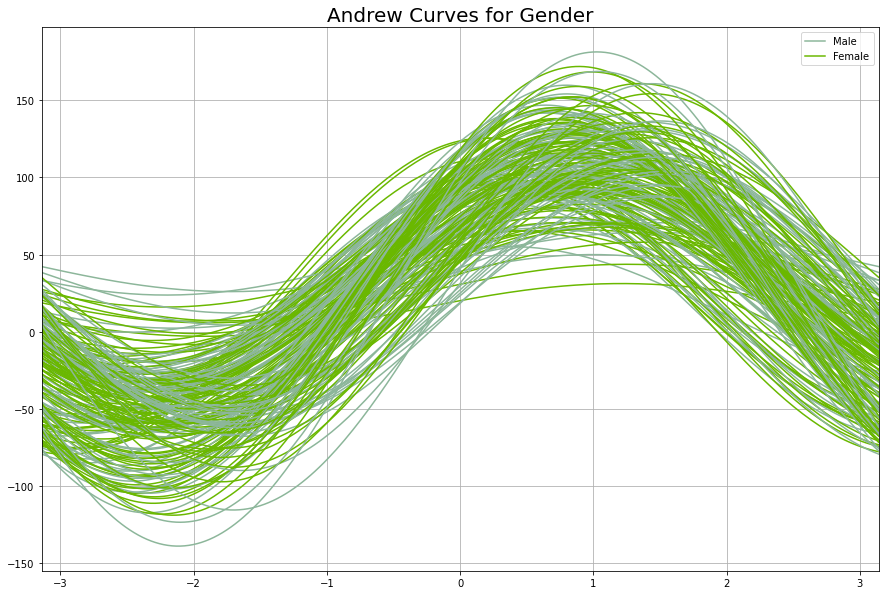

In [7]:
plt.rcParams['figure.figsize'] = (15, 10)


pd.plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

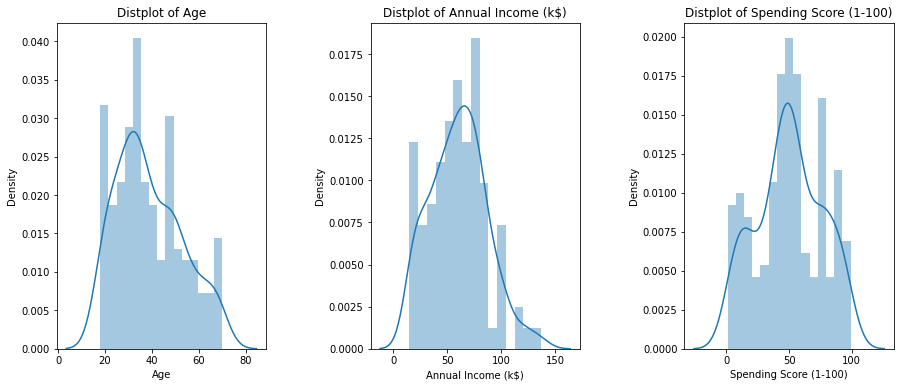

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

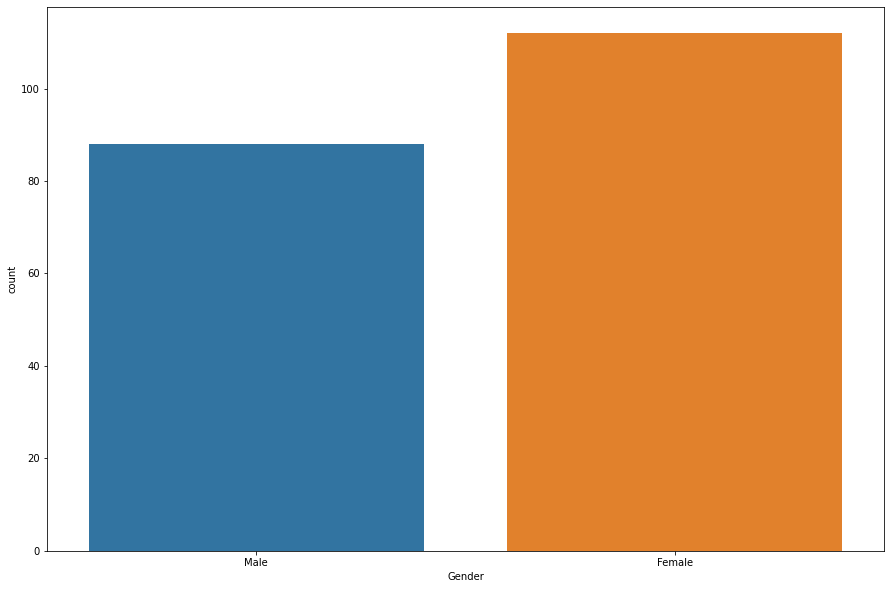

In [9]:
sns.countplot(x = 'Gender' , data = data)

In [10]:
age_bins = range(15,75,5)
medians_by_age_group = data.groupby(["Gender",pd.cut(data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

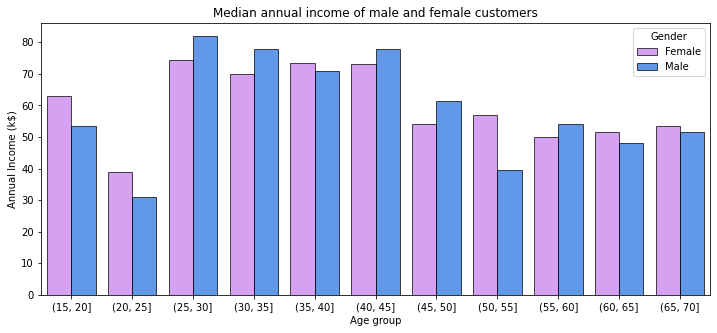

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


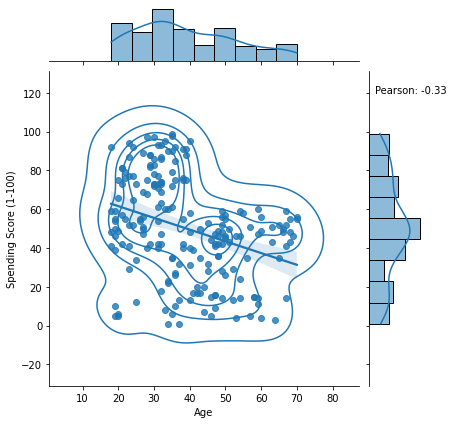

In [12]:
#Correlation
from scipy.stats import pearsonr

# calculating Pearson's correlation
corr, _ = pearsonr(data['Age'], data['Spending Score (1-100)'])

jp = (sns.jointplot('Age', 'Spending Score (1-100)', data=data,
                     kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(5,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


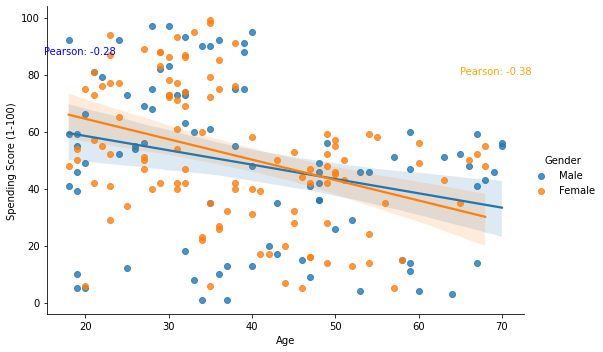

In [13]:
#Investigate different age groups for males and females
males_age = data[data['Gender']=='Male']['Age'] # subset with males age
females_age = data[data['Gender']=='Female']['Age'] # subset with females age

#Who spends more? 
male_spendings = data[data['Gender']=='Male']['Spending Score (1-100)'] # subset with males spending power
female_spendings = data[data['Gender']=='Female']['Spending Score (1-100)']
# calculating Pearson's correlation betweem ,age groups and spending power
corr1, _ = pearsonr(males_age.values, male_spendings.values)
corr2, _ = pearsonr(females_age.values, female_spendings.values)

sns.lmplot('Age', 'Spending Score (1-100)' , data=data, hue='Gender',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

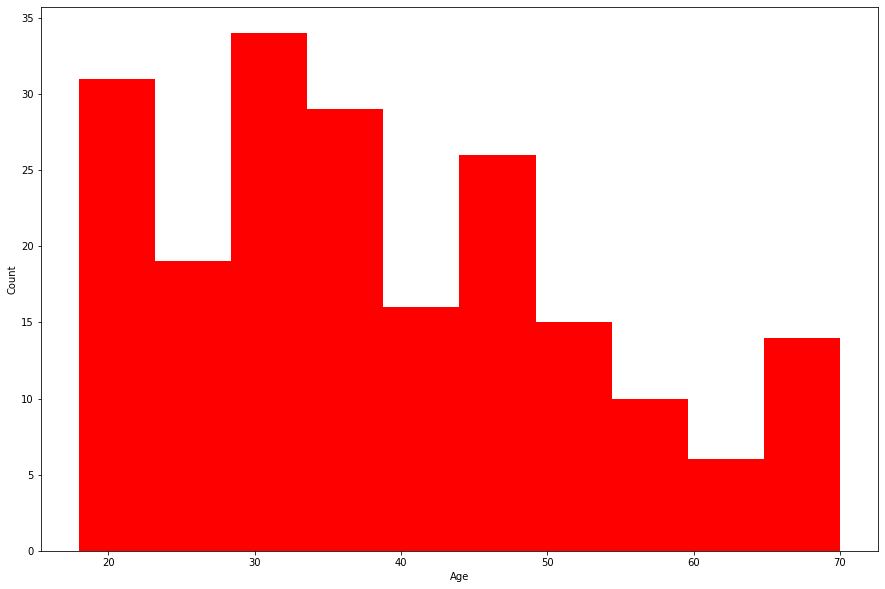

In [14]:
# Visualising the columns 'Age' using Histogram
plt.hist(x=data['Age'], bins=10, orientation='vertical', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 4. Perform descriptive statistics on the dataset.

In [15]:
# Check the column-wise info of the dataframe

data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [17]:
spending = data["Spending Score (1-100)"]

In [18]:
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


In [19]:
age = data["Age"]

In [20]:
statistics(age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


### 5. Check for Missing values and deal with them.

In [21]:
# Sorting the columns to check the null %

((data.isnull().sum()/data.index.size)*100).sort_values(ascending=False)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [22]:
print(f"Duplicated rows: {data.duplicated().sum()}")

Duplicated rows: 0


### 6. Find the outliers and replace them outliers

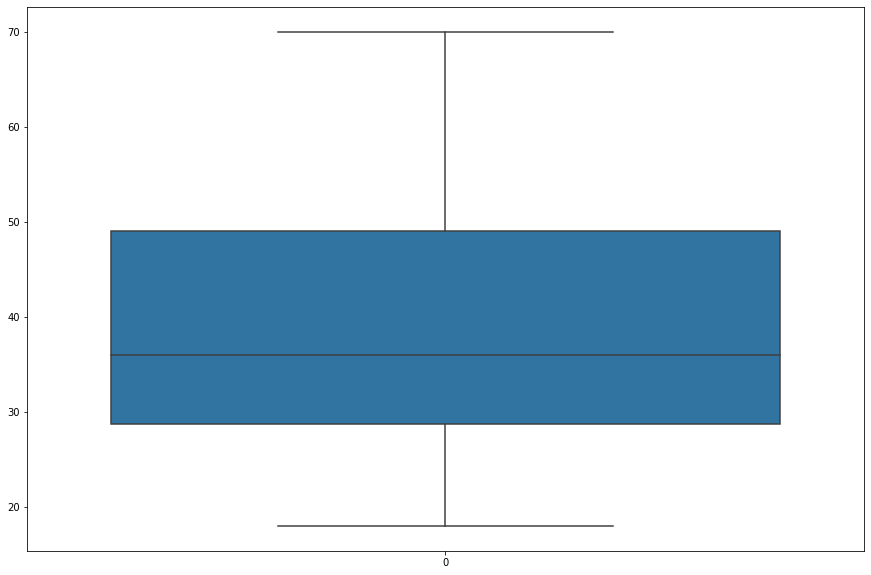

In [23]:
#no missing values
sns.boxplot(data=data['Age'])

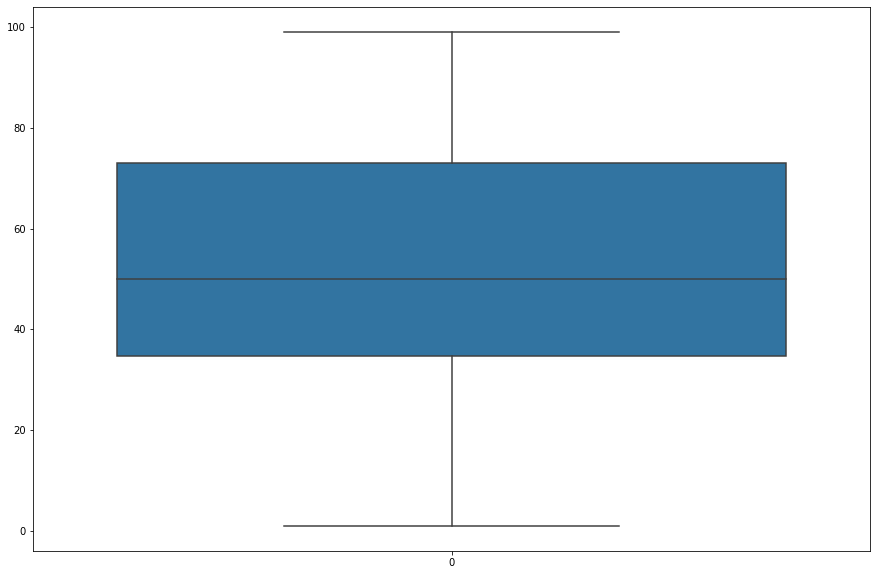

In [24]:
sns.boxplot(data=data['Spending Score (1-100)'])

### 7. Check for Categorical columns and perform encoding.

In [25]:
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
X = data.iloc[:, [2,3]]

In [26]:
x = pd.get_dummies(X)

x.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


### 8. Scaling the data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
X

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

### (9). Perform any of the clustering algorithms

In [31]:
# Training the KMeans model with n_clusters=5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(X)

NameError: ignored

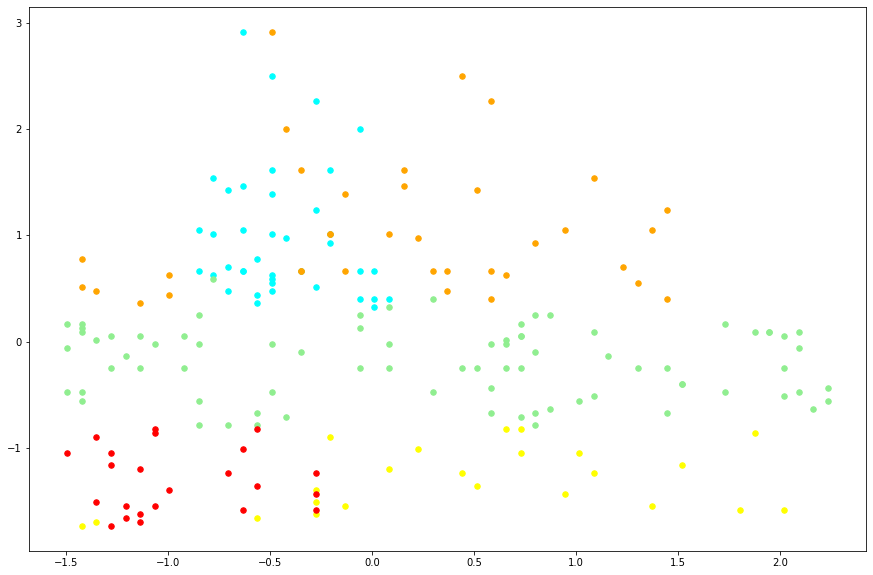

In [64]:
# Visualising the clusters
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x = kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [34]:
data["Male"] = data.Gender.apply(lambda x: 0 if x == "Male" else 1)
data["Female"] = data.Gender.apply(lambda x: 0 if x == "Female" else 1)

In [35]:
c = data.iloc[:, 2:]

In [36]:
# Apply PCA and fit the features selected
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)

In [37]:
print(pca.components_)

[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]


In [38]:
print(pca.explained_variance_)

[1.01748547 0.99256478]


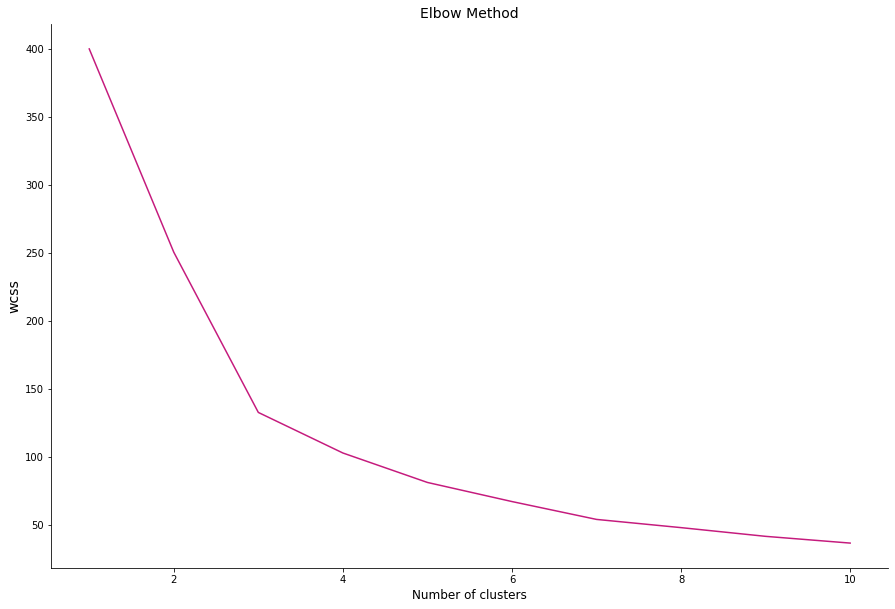

In [39]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

In [40]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(c)

### (10). Add the cluster data with the primary dataset

In [42]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ["Age", "Annual Income", "Spending", "Male", "Female"])

In [43]:
centroids.index_name = "ClusterID"

In [44]:
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [45]:
centroids

,Age,Annual Income,Spending,Male,Female,ClusterID
0,45.217391,26.304348,20.913043,0.608696,0.391304,0
1,32.692308,86.538462,82.128205,0.538462,0.461538,1
2,43.088608,55.291139,49.569620,0.582278,0.417722,2
3,40.666667,87.750000,17.583333,0.472222,0.527778,3
4,25.521739,26.304348,78.565217,0.608696,0.391304,4


In [46]:
X_new = np.array([[43, 66, 46, 0, 5]]) 
 
new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


### 11. Split the data into dependent and independent variables.

In [47]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = centroids.iloc[:,0:5]
y = centroids.iloc[:,5]

print(x.shape)
print(y.shape)

print(x.columns)

(5, 5)
(5,)
Index(['Age', 'Annual Income', 'Spending', 'Male', 'Female'], dtype='object')


### (12). Split the data into training and testing

In [49]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3, 5)
(3,)
(2, 5)
(2,)


### 13. Build the Model
### 14. Train the Model
### 15. Test the Model

In [50]:
x_train.to_csv("customer-train.csv",index = False)
x_test.to_csv("customer-test.csv",index = False)

In [51]:
corr = centroids.corr(method = 'pearson')
print(corr['Spending'])

Age             -0.825670
Annual Income   -0.008523
Spending         1.000000
Male             0.299569
Female          -0.299569
ClusterID        0.262297
Name: Spending, dtype: float64


#### Linear Regression

In [52]:
def linear_fit(centroids):
    regressor = LinearRegression()
    shell = np.array(centroids['Spending'])
    shell_weight = shell.reshape(-1,1)
    Rings = np.array(centroids['ClusterID'])
    Rings = Rings.reshape(-1,1)
    regressor.fit(shell_weight, Rings)
    y_pred = regressor.predict(shell_weight)
    return y_pred

In [55]:
print(linear_fit(x_train))

[[1.83376806]
 [1.59687849]
 [1.56935345]]


### 16. Measure the performance using Evaluation Metrics.

In [54]:
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import  train_test_split, cross_val_score
[x_train, x_test] =train_test_split(centroids, test_size=0.30, random_state=42, shuffle = True)
error_train = sqrt(mean_squared_error(x_train['Spending'], linear_fit(x_train))) #computing the error in train data
error_test = sqrt(mean_squared_error(x_test['Spending'],linear_fit(x_test)))#computing the error in test data
print("RMSE Error for Linear Regression, Train data is : %.2f"%(error_train))
print("RMSE Error for Linear Regression, Test data is : %.2f"%(error_test))

RMSE Error for Linear Regression, Train data is : 31.14
RMSE Error for Linear Regression, Test data is : 77.92


### Thankyou...!